## Сжатие картинок с помощью SVD разложения
# Сарновский Даниил Вячеславович. НПМбв-02-20
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

In [ ]:
from PIL import Image
import numpy as np
img = Image.open('land.jpg') # можно сделать .resize(())
x = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array
U, S, V = np.linalg.svd(X, full_matrices=False) # разложение SVD
# обратное преобразование из numpy array в PIL с сохранение изображения на диск
Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.png')

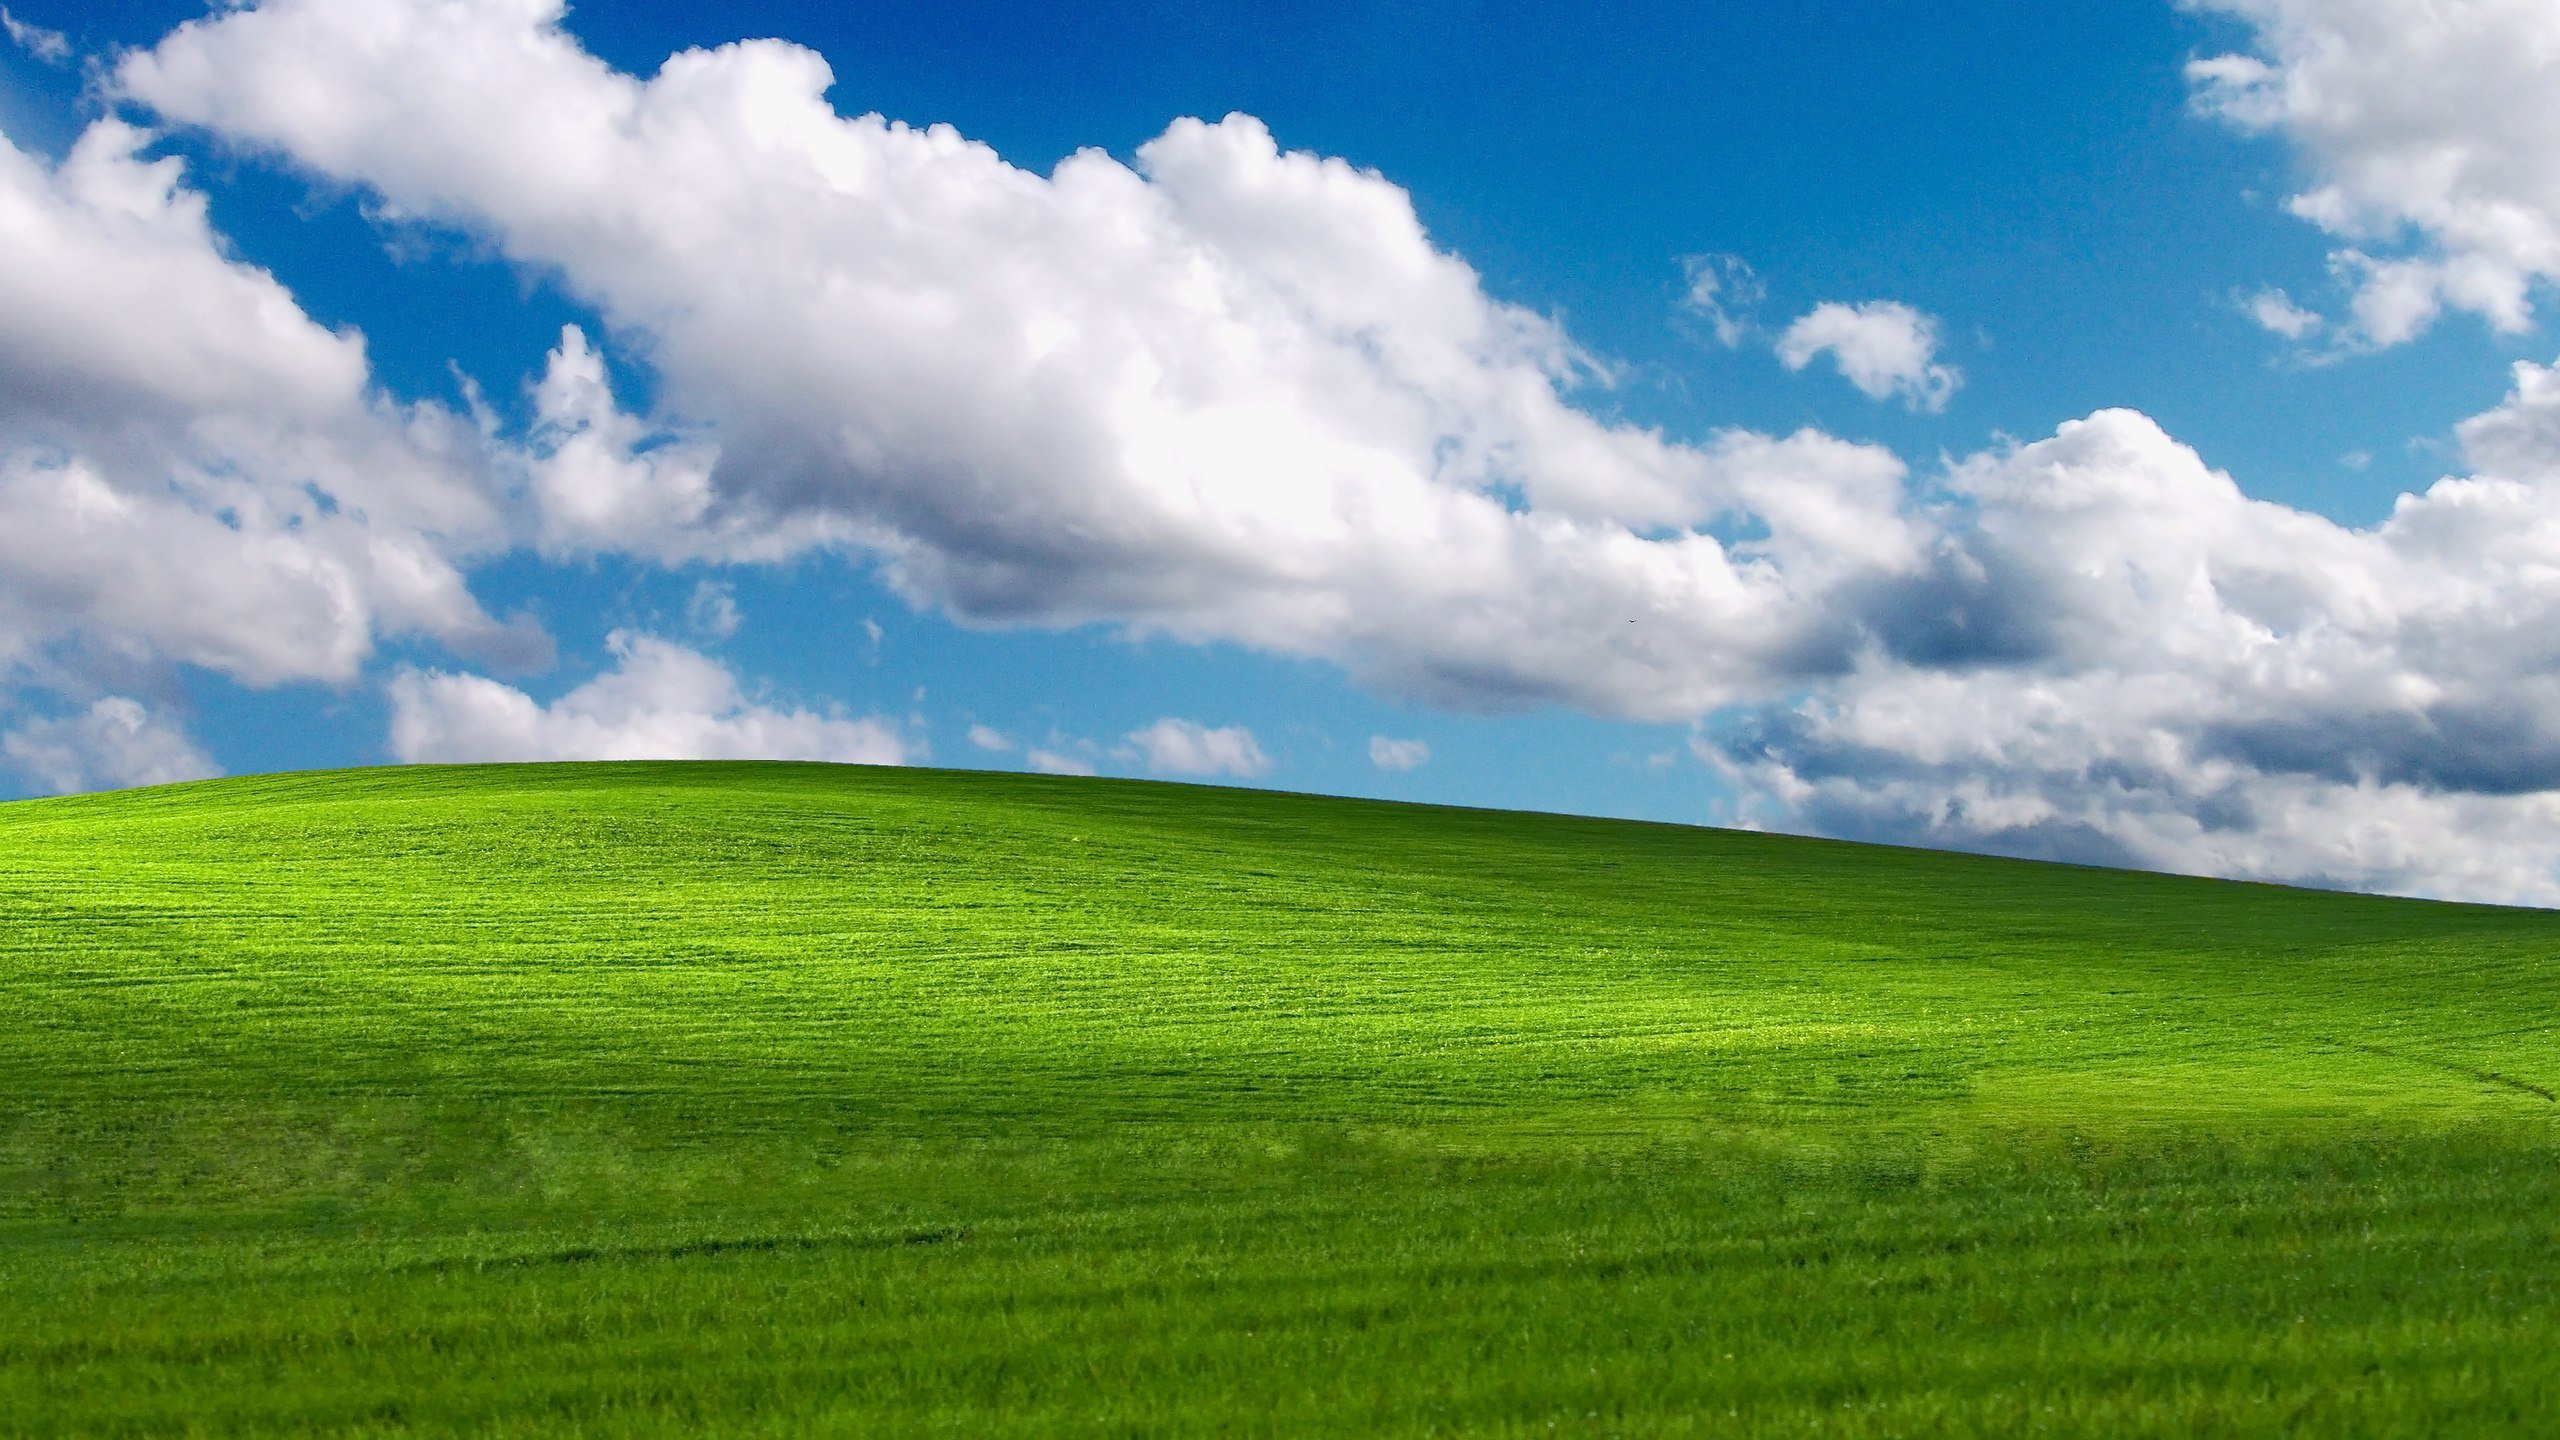

Любая картинка

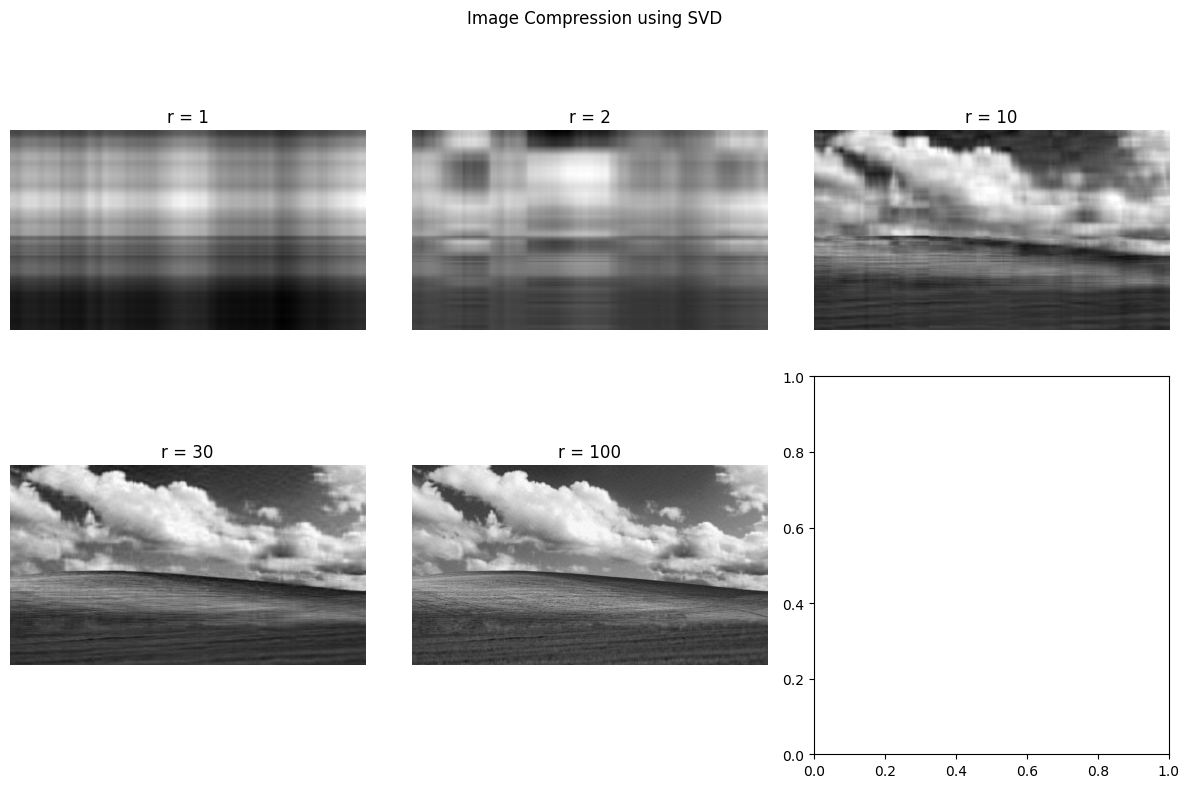

Original image size: 3686400 bytes
Compressed image sizes:
r = 1: 14745600 bytes
r = 2: 14745600 bytes
r = 10: 14745600 bytes
r = 30: 14745600 bytes
r = 100: 14745600 bytes


In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open('land.jpg').convert('L')  # Convert to grayscale
X = np.array(img, dtype=np.float32)

# Perform SVD decomposition
U, S, V = np.linalg.svd(X, full_matrices=False)

# Reconstruct the image using different numbers of singular values
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, r in enumerate([1, 2, 10, 30, 100]):
    Y_r = np.dot(U[:, :r], np.dot(np.diag(S[:r]), V[:r, :]))
    axs[i//3, i%3].imshow(np.clip(Y_r, 0, 255).astype(np.uint8), cmap='gray')
    axs[i//3, i%3].set_title(f'r = {r}')
    axs[i//3, i%3].axis('off')

plt.suptitle('Image Compression using SVD')
plt.tight_layout()
plt.savefig('compressed_images.png')
plt.show()

# Calculate the file sizes
original_size = img.size[0] * img.size[1]  # For grayscale image, mode count is 1
compressed_sizes = [X.nbytes for r in [1, 2, 10, 30, 100]]

print('Original image size:', original_size, 'bytes')
print('Compressed image sizes:')
for r, size in zip([1, 2, 10, 30, 100], compressed_sizes):
    print(f'r = {r}: {size} bytes')

Тут мы сделали все нужные преобразования и вывод нужных картинок. По условию нужно было сделать разложение либо в градациях серого, либо для каждого из RGB каналов. Я выбрал градации серого и используя сингулярные числа предложенные в задании получили такие ихображения. По ним можно сделать вывод, что самое близкое изображение к оригиналу, это у сингулярного числа 30.

Также в задании нужно было сравнить размер оригинальной картинки и картинки с разложением. По итогам видно, что "сжатая" картинка стала весить на 11 059 200 байт больше... Что странно.

Далее я пошел дальше и решил разложить картинки по RGB Каналам. 1 разложение - 1 канал - 1 ячейка юпитера. Также отдельно будет разложение всех трех каналов- для эксперимента.

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open('land.jpg')
img_array = np.array(img)

# Perform SVD decomposition for each RGB channel
U_r, S_r, V_r = np.linalg.svd(img_array[:,:,0], full_matrices=False)
U_g, S_g, V_g = np.linalg.svd(img_array[:,:,1], full_matrices=False)
U_b, S_b, V_b = np.linalg.svd(img_array[:,:,2], full_matrices=False)

# Reconstruct the image using different numbers of singular values for each channel
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, r in enumerate([1, 2, 10, 30, 100]):
    reconstructed_img = np.zeros_like(img_array, dtype=np.uint8)
    for channel, U, S, V in zip(range(3), [U_r, U_g, U_b], [S_r, S_g, S_b], [V_r, V_g, V_b]):
        Y_r = np.dot(U[:, :r], np.dot(np.diag(S[:r]), V[:r, :]))
        reconstructed_img[:,:,channel] = np.clip(Y_r, 0, 255).astype(np.uint8)
    axs[i//3, i%3].imshow(reconstructed_img)
    axs[i//3, i%3].set_title(f'r = {r}')
    axs[i//3, i%3].axis('off')

plt.suptitle('Image Compression using SVD for each RGB channel')
plt.tight_layout()
plt.savefig('compressed_images_rgb.png')
plt.show()

# Calculate the file sizes
original_size = img_array.size * img_array.itemsize
compressed_sizes = [(U.nbytes + S.nbytes + V.nbytes) for U, S, V in [(U_r, S_r, V_r), (U_g, S_g, V_g), (U_b, S_b, V_b)]]

print('Original image size:', original_size, 'bytes')
print('Compressed image sizes:')
for r, size in zip([1, 2, 10, 30, 100], compressed_sizes):
    print(f'r = {r}: {size} bytes')

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open('land.jpg')
img_array = np.array(img)

# Perform SVD decomposition for the blue channel
U_b, S_b, V_b = np.linalg.svd(img_array[:,:,2], full_matrices=False)  # Blue channel

# Reconstruct and plot images for the blue channel with different numbers of singular values
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, r in enumerate([1, 2, 10, 30, 100]):
    Y_r = np.dot(U_b[:, :r], np.dot(np.diag(S_b[:r]), V_b[:r, :]))
    axs[i//3, i%3].imshow(np.clip(Y_r, 0, 255).astype(np.uint8), cmap='Blues')
    axs[i//3, i%3].set_title(f'r = {r}')
    axs[i//3, i%3].axis('off')

plt.suptitle('Image Compression using SVD for the Blue Channel')
plt.tight_layout()
plt.savefig('compressed_images_blue_channel.png')
plt.show()

# Calculate the file sizes
original_size = img_array[:,:,2].size * img_array[:,:,2].itemsize  # For the blue channel
compressed_sizes = [(U_b.nbytes + S_b.nbytes + V_b.nbytes) for r in [1, 2, 10, 30, 100]]

print('Original blue channel size:', original_size, 'bytes')
print('Compressed blue channel sizes:')
for r, size in zip([1, 2, 10, 30, 100], compressed_sizes):
    print(f'r = {r}: {size} bytes')

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open('land.jpg')
img_array = np.array(img)

# Perform SVD decomposition for the red channel
U_r, S_r, V_r = np.linalg.svd(img_array[:,:,0], full_matrices=False)  # Red channel

# Reconstruct and plot images for the red channel with different numbers of singular values
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, r in enumerate([1, 2, 10, 30, 100]):
    Y_r = np.dot(U_r[:, :r], np.dot(np.diag(S_r[:r]), V_r[:r, :]))
    axs[i//3, i%3].imshow(np.clip(Y_r, 0, 255).astype(np.uint8), cmap='Reds')
    axs[i//3, i%3].set_title(f'r = {r}')
    axs[i//3, i%3].axis('off')

plt.suptitle('Image Compression using SVD for the Red Channel')
plt.tight_layout()
plt.savefig('compressed_images_red_channel.png')
plt.show()

# Calculate the file sizes
original_size = img_array[:,:,0].size * img_array[:,:,0].itemsize  # For the red channel
compressed_sizes = [(U_r.nbytes + S_r.nbytes + V_r.nbytes) for r in [1, 2, 10, 30, 100]]

print('Original red channel size:', original_size, 'bytes')
print('Compressed red channel sizes:')
for r, size in zip([1, 2, 10, 30, 100], compressed_sizes):
    print(f'r = {r}: {size} bytes')

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open('land.jpg')
img_array = np.array(img)

# Perform SVD decomposition for the green channel
U_g, S_g, V_g = np.linalg.svd(img_array[:,:,1], full_matrices=False)  # Green channel

# Reconstruct and plot images for the green channel with different numbers of singular values
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, r in enumerate([1, 2, 10, 30, 100]):
    Y_r = np.dot(U_g[:, :r], np.dot(np.diag(S_g[:r]), V_g[:r, :]))
    axs[i//3, i%3].imshow(np.clip(Y_r, 0, 255).astype(np.uint8), cmap='Greens')
    axs[i//3, i%3].set_title(f'r = {r}')
    axs[i//3, i%3].axis('off')

plt.suptitle('Image Compression using SVD for the Green Channel')
plt.tight_layout()
plt.savefig('compressed_images_green_channel.png')
plt.show()

# Calculate the file sizes
original_size = img_array[:,:,1].size * img_array[:,:,1].itemsize  # For the green channel
compressed_sizes = [(U_g.nbytes + S_g.nbytes + V_g.nbytes) for r in [1, 2, 10, 30, 100]]

print('Original green channel size:', original_size, 'bytes')
print('Compressed green channel sizes:')
for r, size in zip([1, 2, 10, 30, 100], compressed_sizes):
    print(f'r = {r}: {size} bytes')

Тут получилось интересные выводы - для хранения одноканальной картинки в цвете RGB требуется чуть больше чем в 4 раза больше памяти, чем в градациях серого и почти в 13 раз, чем в исходном варианте. Также интересно, что при разложении всего RGB спектра и одного из каналов, размер получающихся картинок остается неизменным, что говорит о том, что при SVD разложении в памяти картинки остаются все цвета, но показываются они избирательно.